# **Introduction to Bayesian Inferecne Using Python**
- Bayesian method uses the idea of Bayes’ theorem to make inferences from data about the underlying process that generated the data.
$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$







## [**Estimating Posterior Distributions**](https://statsthinking21.github.io/statsthinking21-core-site/bayesian-statistics.html#estimating-posterior-distributions)

- Consider a screening test for a binary outcome (the event that an individual has disease).

  - **Sensitivity**=$P(T^+|D^+)$: Probability test is positive given disease

  - **Specificity**=$P(T^-|D^-)=1-P(T^+|D^-)$: Probability test is negative given no disease


- Bayes' Theorem:

$$P(D^+|T^+)=\frac{P(T^+|D^+)P(D^+)}{P(T^+)}$$
where
- **Prior**=$P(D^+)$: prior probability of disease (prevalence). This is the belief about the disease before any test.

- **Likelihood**=$P(T^+|D^+)$: Likelihood of a positive test for those who have the disease.

- **Marginal** Likelihood =$P(T^+)$: Total probability of a positive test (normalizer).

$$P(T^+)=P(T^+|D^+)P(D^+)+P(T^+|D^-)P(D^-)$$
- **Posterior**=$P(D|T^+)$: Probability of disease given a positive result (what we want to compute).

- **Example**: Let's say that the rate of symptomatic individuals who actually are infected with COVID-19 is 7.4%. Thus, our prior probability that someone with symptoms actually has COVID-19 is 0.074. The specificity of the PCR test is 99% (that is, it rarelly reports the presence of the virus when it is not present). Assume its sensitivity is no higher than 90%.  

- First let's look at the probability of disease given a single positive test.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

- Let's define test parameters

In [2]:
sensitivity = 0.90
specificity = 0.99
prior       = 0.074 # prevalence

- The high specificity of the test means that most people who test positive actually have the disease.

- What is the likelihood?

In [3]:
likelihood = sensitivity
likelihood

0.9

- What is the probability of the disease?

In [4]:
marginal_likelihood = sensitivity * prior + (1 - specificity) * (1 - prior)
marginal_likelihood

0.07586

What is the probability of the disease if the test was positive?

In [5]:
posterior_prob = (likelihood * prior) / marginal_likelihood
posterior_prob

0.8779330345373055

In [6]:
# sensitivity = 0.95
# specificity = 0.90

- Let's generate varying priors (prevalences) from 0.1% to 50%

In [7]:
priors = np.linspace(0.001, 0.5, 500)
# priors

- Calculate the posterior probability for positive test.
- Let's first create a function to compute the posterior.

In [8]:
def compute_posterior(prior, sensitivity, specificity):
  likelihood = sensitivity
  marginal_likelihood = sensitivity * prior + (1 - specificity) * (1 - prior)
  posterior = (likelihood * prior) / marginal_likelihood
  return posterior

In [9]:
posterior_probs = compute_posterior(priors, sensitivity, specificity)
# posterior_probs

- Now let's plot the posterior probabilities as a function of the priors (prevalences).  

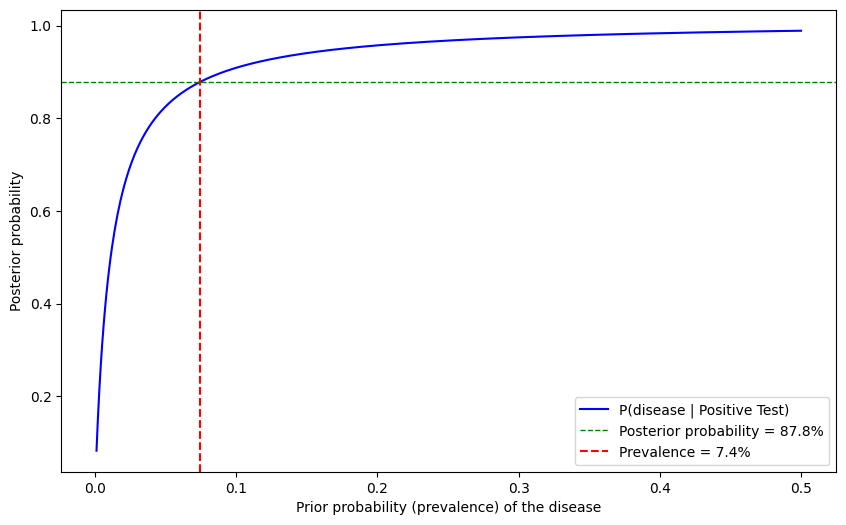

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(priors, posterior_probs, label='P(disease | Positive Test)', color='blue')
plt.axhline(0.878, linestyle='--', color='green', linewidth=1, label='Posterior probability = 87.8%')
plt.axvline(0.074, linestyle='--', color='red', label='Prevalence = 7.4%')
plt.xlabel('Prior probability (prevalence) of the disease')
plt.ylabel('Posterior probability')
plt.legend()
plt.show();


- **Example**: Suppose a drug is adminitered to 100 people, and 64 of them responded positively to the effectiveness of the drug. What we want to estimate is the probability distribution for the proportion of responders $\pi$, given the data.

In [11]:
num_tested = 100
num_responders = 64
num_obs = 100

**Generate Proportions**
- Let's generate the proportion of responders from 0.0 to 1.0, in steps of 0.01.
- Then, we will estimate the posterior probabiilty for each particular value.

In [12]:
props = np.linspace(0.0, 1, num_obs).round(2)
# props

 **Specify the Priors**

- Assuming no prior information about the effectiveness of the drug, we will use a uniform distribution as the prior.
- That is, the prior is equal for all possible values.

In [13]:
uni_priors = 1/num_obs
uni_priors

0.01

**Compute the likelihood**
- We can compute the likelihood of the observed data using the binomial density function

In [14]:
from scipy.stats import binom
import pandas as pd

In [15]:
likes = binom.pmf(num_responders, num_tested, props)
# likes

**Determine the Marginal Likelihood**
- The marginal likelihood is calculated by adding up the likelihood of each possible proportion times its prior probability.

In [16]:
margs = (likes * uni_priors).sum().item()
margs

0.009885392705045116

**Calculate the Posterior**

In [17]:
posts = (likes * uni_priors) / margs
# posts

- Let's present in a dataframe.

In [18]:
bayes_df = pd.DataFrame(
    {'Proportion': props,
     "Prior": uni_priors,
     "Likelihood": likes,
     "Marginal": margs,
     "Posterior": posts
     })
bayes_df

,Proportion,Prior,Likelihood,Marginal,Posterior
0,0.00,0.01,0.000000e+00,0.009885,0.000000e+00
1,0.01,0.01,1.376951e-101,0.009885,1.392915e-101
2,0.02,0.01,1.762423e-82,0.009885,1.782855e-82
3,0.03,0.01,2.267746e-71,0.009885,2.294037e-71
4,0.04,0.01,1.547588e-63,0.009885,1.565530e-63
...,...,...,...,...,...
95,0.96,0.01,6.848102e-25,0.009885,6.927496e-25
96,0.97,0.01,4.224816e-29,0.009885,4.273797e-29
97,0.98,0.01,3.729068e-35,0.009885,3.772301e-35
98,0.99,0.01,1.039212e-45,0.009885,1.051260e-45


**Compare the Likeihood, Prior and Posterior**
- Let's visualize.

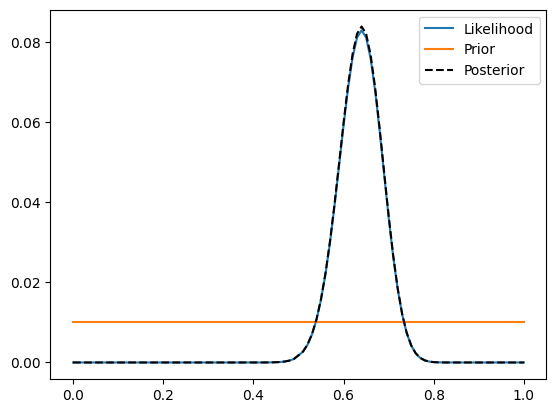

In [19]:
plt.plot(bayes_df['Proportion'], bayes_df['Likelihood'], label='Likelihood')
plt.plot(bayes_df['Proportion'], bayes_df['Prior'], label='Prior')
plt.plot(bayes_df['Proportion'], bayes_df['Posterior'], 'k--', label='Posterior')
plt.legend();

- The posterior and likelihood are almost identical since that the prior is uniform across all possible values.  

## **Effect of Different Priors**
- Let's say that we now run a new study on 1000 people with the same treatment. And we find that 312 of the 1000 individuals respond postively to the treatment.

- In the previous example, we used a flat (uniform) prior.

- It means we didn’t have any reason to believe that any particular value of $\pi$ was more or less likely.
- Now let's look at a case where the prior is not uniform.

- Specifically, let's use now the previous posteriors as priors (This is called *Bayesian Updating*).


In [20]:
num_tested = 1000
num_responders = 312
num_obs = 100

In [21]:
props = np.linspace(0.0, 1, num_obs).round(2)
# props

In [22]:
priors = posts
# priors

In [23]:
likelihoods = binom.pmf(num_responders, num_tested, props)
# likelihoods

In [24]:
marginals = (likelihoods * priors).sum().item()
marginals

1.1027212542346508e-11

In [25]:
posteriors = (likelihoods * priors) / marginals
# posteriors

In [26]:
bayes2_df = pd.DataFrame(
    {'Proportion': props,
     "Prior": priors,
     "Likelihood": likelihoods,
     "Marginal": marginals,
     "Posterior": posteriors
     })
# bayes2_df

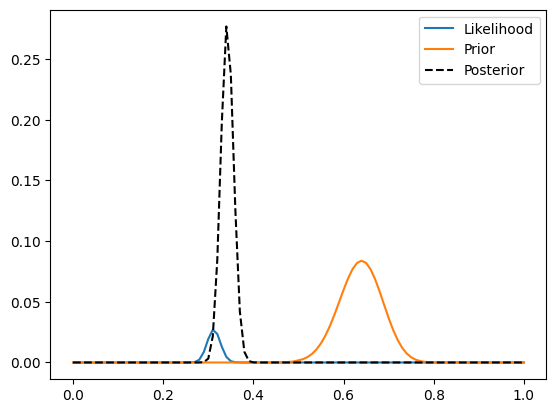

In [27]:
plt.plot(bayes2_df['Proportion'], bayes2_df['Likelihood'], label='Likelihood')
plt.plot(bayes2_df['Proportion'], bayes2_df['Prior'], label='Prior')
plt.plot(bayes2_df['Proportion'], bayes2_df['Posterior'], 'k--', label='Posterior')
plt.legend();

**Two important things to note**:
- First, the prior is substantially wider than the likelihood.
  - More data going into the likelihood (1000 data points) compared to the prior (100 data points).
  - More data reduces uncertainty.  
- Second, the posterior is closer to the value observed for the new study than for the first.
  - Putting greater weight on the estimate is more precise due to a larger sample.

- **Example**: Now assume a normal distribution prior:
$\pi \sim N(0.5,0.2^2)$

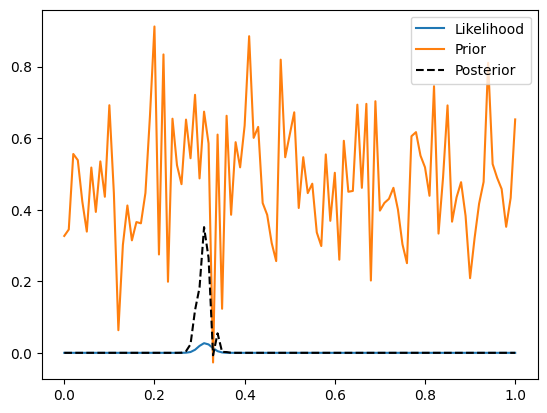

In [28]:
num_tested = 1000
num_responders = 312
num_obs = 100

props = np.linspace(0.0, 1, num_obs).round(2)
priors = np.random.normal(loc=0.5, scale=0.2, size=num_obs)
likelihoods = binom.pmf(num_responders, num_tested, props)
marginals = (likelihoods * priors).sum().item()
posteriors = (likelihoods * priors) / marginals

bayes3_df = pd.DataFrame(
    {'Proportion': props,
     "Prior": priors,
     "Likelihood": likelihoods,
     "Marginal": marginals,
     "Posterior": posteriors
     })
bayes3_df

plt.plot(bayes3_df['Proportion'], bayes3_df['Likelihood'], label='Likelihood')
plt.plot(bayes3_df['Proportion'], bayes3_df['Prior'], label='Prior')
plt.plot(bayes3_df['Proportion'], bayes3_df['Posterior'], 'k--', label='Posterior')
plt.legend();

**Choosing a Prior**

- The impact of priors on the resulting inferences are the most controversial aspect of Bayesian statistics.

- There are various ways to choose one’s priors, which (as we saw above) can impact the resulting inferences.

  - **Uninformative priors** influence the resulting posterior as little as possible, as we saw in the example before.

  - It’s common to use **weakly informative priors** (or default priors), which influence the result slightly.
  
  - It is also possible to use priors (called **empirical priors**) based on the scientific literature or pre-existing data.


## **Implementing Metropolis-Hastings (MH) Algorithm**

- Initialize the value of $\bf{X}$ at $\bf{x}_i$.

- Generate a new value $\bf{x}_{i+1}$ from $\bf{x}_i$ using a (symmetric) proposal distribution $q(\bf{x}_{i+1}|\bf{x}_i)$.

- Compute the probability of accepting the new value as:

$$p_{accept}=p(x_{i+1}|x_i)=\min\left[1,\frac{p(x_{i+1})\;q(x_i|x_{i+1})}{p(x_{i})\;q(x_{i+1}|x_{i})}\right]$$

- Save the new value $\bf{x}_{i+1}$ if $p_{accept}>r$ where $r\sim U(0,1)$. Otherwise, save the old value $\bf{x}_i$.

- Repeat steps $2-4$ until a sufficiently large sample of values has been generated.


- **Example**: Consider the Beta-Bernoulli model: number of successes has a Bernoulli distribution with parameter $\pi$ which has a Beta distribution
$$Y\sim Bernoulli(\pi)$$
$$\pi \sim Beta(\alpha, \beta)$$

  - Assuming we do not know how to compute the posterior, let's implement the MH algorithm to approximate the posterior.

In [29]:
import numpy as np
import scipy.stats as stats

- Generate some data for this purpose.

In [30]:
y = stats.bernoulli(0.8).rvs(20)
y

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

- Function to compute posterior

In [31]:
def compute_posterior(pi, y, alpha=1, beta=1):
    if 0 <= pi <= 1:
        prior       = stats.beta(alpha, beta).pdf(pi)
        likelihood  = stats.bernoulli(pi).pmf(y).prod()
        prob        = likelihood * prior
    else:
        prob        = -np.inf
    return prob

1. Initialize the value and evaluate the posterior

In [32]:
old_pi = 0.5 # initial value
alpha  = 1
beta   = 1

old_posterior = compute_posterior(old_pi, y, alpha, beta)
old_posterior

np.float64(9.536743164062504e-07)

2. Generate new value from the old value by sampling from a proposal distribution

  - Assume the proposal distribution is a normal distribution.

In [33]:
sd = 0.05

new_pi = stats.norm(old_pi, sd).rvs()
new_pi

np.float64(0.4664747308315079)

3. Evaluate the posterior at the new generated value of the parameter

In [34]:
new_posterior = compute_posterior(new_pi, y, alpha, beta)
new_posterior

np.float64(4.072582949378296e-07)

4. Decide to accept or ignore the new value.
  - Compute the probability of acceptance for the new value.
  $$p_{accept}=\frac{\text{New Posterior}}{\text{Old Posterior}}$$
  
  - If $p_{accept} >$ Random Probability, accept the new value. Otherwise, save the old one.

In [35]:
p_accept = new_posterior / old_posterior
p_accept

np.float64(0.42704127387272944)

In [36]:
rand_prob = stats.uniform(0, 1).rvs()
rand_prob

np.float64(0.8001571921876246)

In [37]:
if p_accept > rand_prob:
  old_pi         = new_pi
  old_posterior  = new_posterior

In [38]:
old_pi

0.5

**Complete Loop for MH ALgorithm**
- Let's write a loop to iterate over a number of iterations

In [39]:
num_iters = 1000
alpha     = 1
beta      = 1

sd  = 0.05

current_pi        = 0.5
current_posterior = compute_posterior(current_pi, y, alpha, beta)

samples_trace = {"π": np.zeros(num_iters)}

for i in range(num_iters):
  new_pi         = stats.norm(current_pi, sd).rvs()
  new_posterior  = compute_posterior(new_pi, y, alpha, beta)

  p_accept       = new_posterior / current_posterior
  rand_prob      = stats.uniform(0, 1).rvs()

  if p_accept > rand_prob:
    current_pi          = new_pi
    current_posterior   = new_posterior

  samples_trace["π"][i] = current_pi.item()

- A common way to inspect the results of a Bayesian inference is to plot the sampled values per iteration.

In [40]:
import matplotlib.pyplot as plt

[]

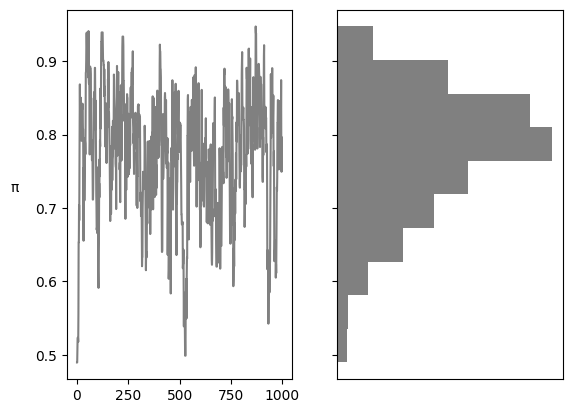

In [41]:
_, axes = plt.subplots(1,2, sharey=True)
axes[0].plot(samples_trace["π"], '0.5')
axes[0].set_ylabel('π', rotation=0, labelpad=15)
axes[1].hist(samples_trace["π"], color='0.5', orientation="horizontal", density=True)
axes[1].set_xticks([])

- It is also useful to compute some numerical summaries.

- Here we use the [`Arviz`](https://python.arviz.org/en/latest/index.html) package of Python.

- It is designed for exploratory analysis of Bayesian models.

In [42]:
import arviz as az

In [43]:
az.summary(samples_trace, kind="stats", round_to=3)

,mean,sd,hdi_3%,hdi_97%
π,0.774,0.085,0.616,0.922


- The results show the mean, standard deviation and the **highest density interval** (HDI) 94% of the parameter $\pi$.

- The HDI is the shortest interval containing a given probability density, 94% (default in `arviz` ).

- To change the default HDI probability globally, you can use `az.rcParams["stats.ci_prob"] = 0.95`.

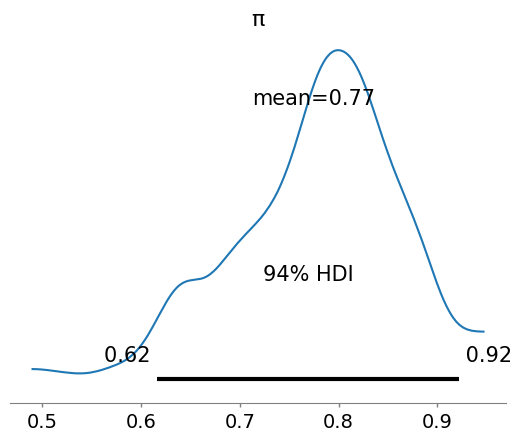

In [44]:
az.plot_posterior(samples_trace);

- The curve in the plot is computed using a kernel density estimator (KDE).
- It is like the smooth version of a histogram.

#**Bayesian Modeling Using PyMC**
- PyMC is a Python library for Bayesian statistical modeling and probabilistic machine learning.

- It uses MCMC sampling algorithms to approximate the posterior distribution of parameters:

    - NUTS (No-U-Turn Sampler): Efficient MCMC algorithm for complex models

    - Metropolis-Hastings Algorithm

    - Maximum a Posteriori (MAP) Estimation

    - Other



## **Beta-Binomial Model**

In [45]:
import pymc as pm
import scipy.stats as stats

### **Data**

In [46]:
y_obs = stats.bernoulli(0.6).rvs(20)
y_obs

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0])

### **Model Specification**

- To declare a model in `PyMC`, instantiate a new model object like `model_name = pm.Model()`.

- Then, inside a `with` statement:

  1. Specify the priors the prior distribution of unknown parameter.

  2. Define the sampling distribution of the outcome and condition on the observed data.

In [47]:
beta_binomial_model = pm.Model()
print(beta_binomial_model)

In [48]:
with beta_binomial_model:
    pi = pm.Beta("π", alpha=1, beta=1)
    y  = pm.Binomial("y", n=1, p=pi, observed=y_obs)

- The `pm.Beta()` constructor to create a random variable to use as a Beta prior.
-  Other distributions are `Normal()`, `Exponential()`, `Gamma()`, `Binomial()`, etc.

In [49]:
pi

π

In [50]:
y

y

In [51]:
beta_binomial_model

### **Drawing Samples from the Posterior Distribution**

- The [`sample()`](https://www.pymc.io/projects/docs/en/stable/api/generated/pymc.sample.html#pymc-sample) function is used to simulate samples for the given number of iterations.
- It then returns an [`InferenceData`](https://python.arviz.org/en/latest/api/generated/arviz.InferenceData.html#arviz-inferencedata) object containing the samples collected and other attributes.
- Note `sample()` generates a set of parallel chains, depending on how many compute cores are availabel on the machine.
- It generates 1000 samples by default.


In [52]:
with beta_binomial_model:
    idata = pm.sample(1000, return_inferencedata=True)

Output()

In [53]:
print(idata)

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data


### **Graphical Model Representation**


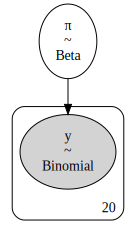

In [54]:
pm.model_to_graphviz(beta_binomial_model)

- The ovals represent the prior and likelihood.
- The 20 in this case indicates the number of observations.

### **Posterior Analysis**

- The [`Arviz`](https://python.arviz.org/en/latest/index.html) library can be used for plotting and diagnostics.

- A simple posterior plot can be created using `plot_trace()`.

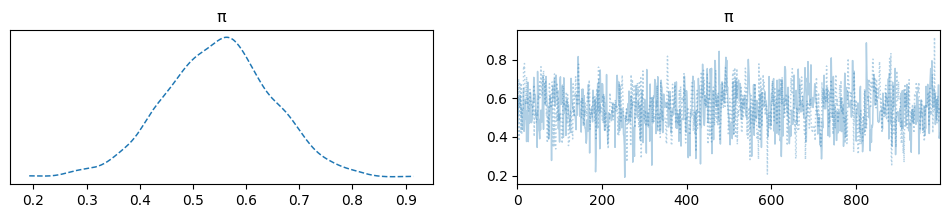

In [55]:
az.plot_trace(idata, combined=True);

- The left figure is a smoothed frequency curve (using kernel density estimation) of the marginal posteriors of the random variable.
- The right side figure shows the samples of the Markov chain plotted in sequential order.
- In addition, the `summary` function provides a text-based output of common posterior statistics:

In [56]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
π,0.55,0.1,0.35,0.73,0.0,0.0,680.87,1235.01,1.0


-  Monte Carlo standard error of the mean — if near zero, high precision.
- Monte Carlo standard error for the standard deviation — if near 0, it is very precise.
- Convergence diagnostic: `r_hat`=1.0 — perfect convergence (target: ~1.0)

## **Poisson Regression Model**

- **Example**: consider a Bayesian Poisson regression model with two covariates.

 $$Y\sim Poisson(\mu) \text{ where } \mu=e^{\beta_0+\beta_1x_1+\beta_2x_2}$$

- Let's assign a zero-mean normal priors with variance of 100 for each coefficient:

$$\beta_j\sim N(0,100)$$

- The implementation of a linear regression model [here](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#a-motivating-example-linear-regression).

#### **Generating Data for Modeling**

- To simulate some data from this model using the random module from `NumPy`.

- Then, to use `PyMC` to try to recover the corresponding parameters.

In [57]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

- Parameters:
  - $x_1$ has strong effect
  - $x_2$ negligible effect

In [58]:
beta0 = 1.00
beta1 = 0.95
beta2 = 0.01

In [59]:
rng = np.random.default_rng(seed=42)
size = 100
# Covariates
x1 = rng.normal(size=size)
x2 = rng.normal(scale=0.2, size=size)

# Linear predictor
eta = beta0 + beta1 * x1 + beta2 * x2

# Mean response
mu = np.exp(eta)

# Generate count data
y_obs= rng.poisson(mu)
y_obs

array([ 0,  0,  4,  6,  1,  0,  5,  2,  1,  4,  2,  9,  4,  6,  3,  0,  1,
        0,  2,  3,  3,  0,  6,  1,  0,  1,  9,  5,  3,  4, 20,  4,  1,  1,
        4, 11,  1,  0,  2,  7,  6,  4,  0,  7,  4,  4,  3,  5,  8,  1,  2,
        3,  0,  0,  2,  1,  5,  8,  2,  8,  1,  2,  1,  7,  7,  3,  3,  1,
        4,  2,  2,  0,  2,  9,  3,  3,  1,  1,  5,  4,  4,  0,  1,  1,  4,
        3,  2,  2,  4,  3,  5,  5,  3,  2,  0,  2,  0,  0,  2,  0])

- Here is what the simulated data look like.

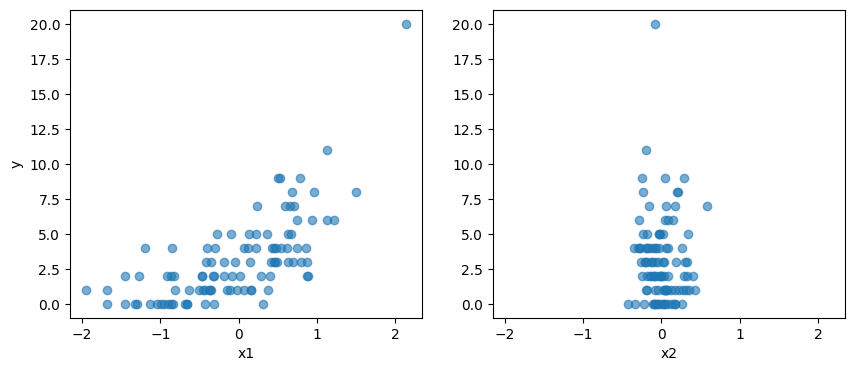

In [60]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(x1, y_obs, alpha=0.6)
axes[1].scatter(x2, y_obs, alpha=0.6)
axes[0].set_ylabel("y")
axes[0].set_xlabel("x1")
axes[1].set_xlabel("x2");

### **Specify Model and Simulate Samples**

- As previous, declare a new model object to specify the model in `PyMC`.

- Specification of the model components is performed inside a `with` statement.

  1. Specify the priors.

  2. Express the expected value `mu` of the outcome as a function of the covariates.

  3. Define the sampling distribution of the outcome in the observed data.

  4. Simulate samples from the posterior distribution using [`sample()`](https://www.pymc.io/projects/docs/en/stable/api/generated/pymc.sample.html#pymc-sample).

In [61]:
poisson_model = pm.Model()

with poisson_model:
    beta0 = pm.Normal("β_0", mu=0, sigma=10)
    beta1 = pm.Normal("β_1", mu=0, sigma=10)
    beta2 = pm.Normal("β_2", mu=0, sigma=10)

    eta = beta0 + beta1*x1 + beta2*x2
    mu = np.exp(eta)

    y = pm.Poisson("y", mu=mu, observed=y_obs)
    # poisson_model.debug()
    idata = pm.sample()

Output()

In [62]:
beta0

β_0

In [63]:
beta1

β_1

In [64]:
beta2

β_2

In [65]:
poisson_model

In [66]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

- The various attributes of the `InferenceData` object can be queried.

- For example, we can retrieve the sampling trace using the `idata.posterior()` attribute.

- To see the first 5 values for the `β_0` parameter in each chain as follows:

In [67]:
idata.posterior["β_0"].sel(draw=slice(0, 4))

<xarray.DataArray 'β_0' (chain: 2, draw: 5)> Size: 80B
array([[0.85226088, 1.06486304, 0.87640562, 0.94750293, 0.97026923],
       [0.9921092 , 0.97573929, 0.97573929, 0.92712821, 0.90333376]])
Coordinates:
  * chain    (chain) int64 16B 0 1
  * draw     (draw) int64 40B 0 1 2 3 4

- The first dimension of the returned array is the chain index.

- The second dimension is the sampling index.

### **Posterior Analysis**

- The [`Arviz`](https://python.arviz.org/en/latest/index.html) library can be used for plotting and diagnostics.

- A simple posterior plot can be created using `plot_trace()`.

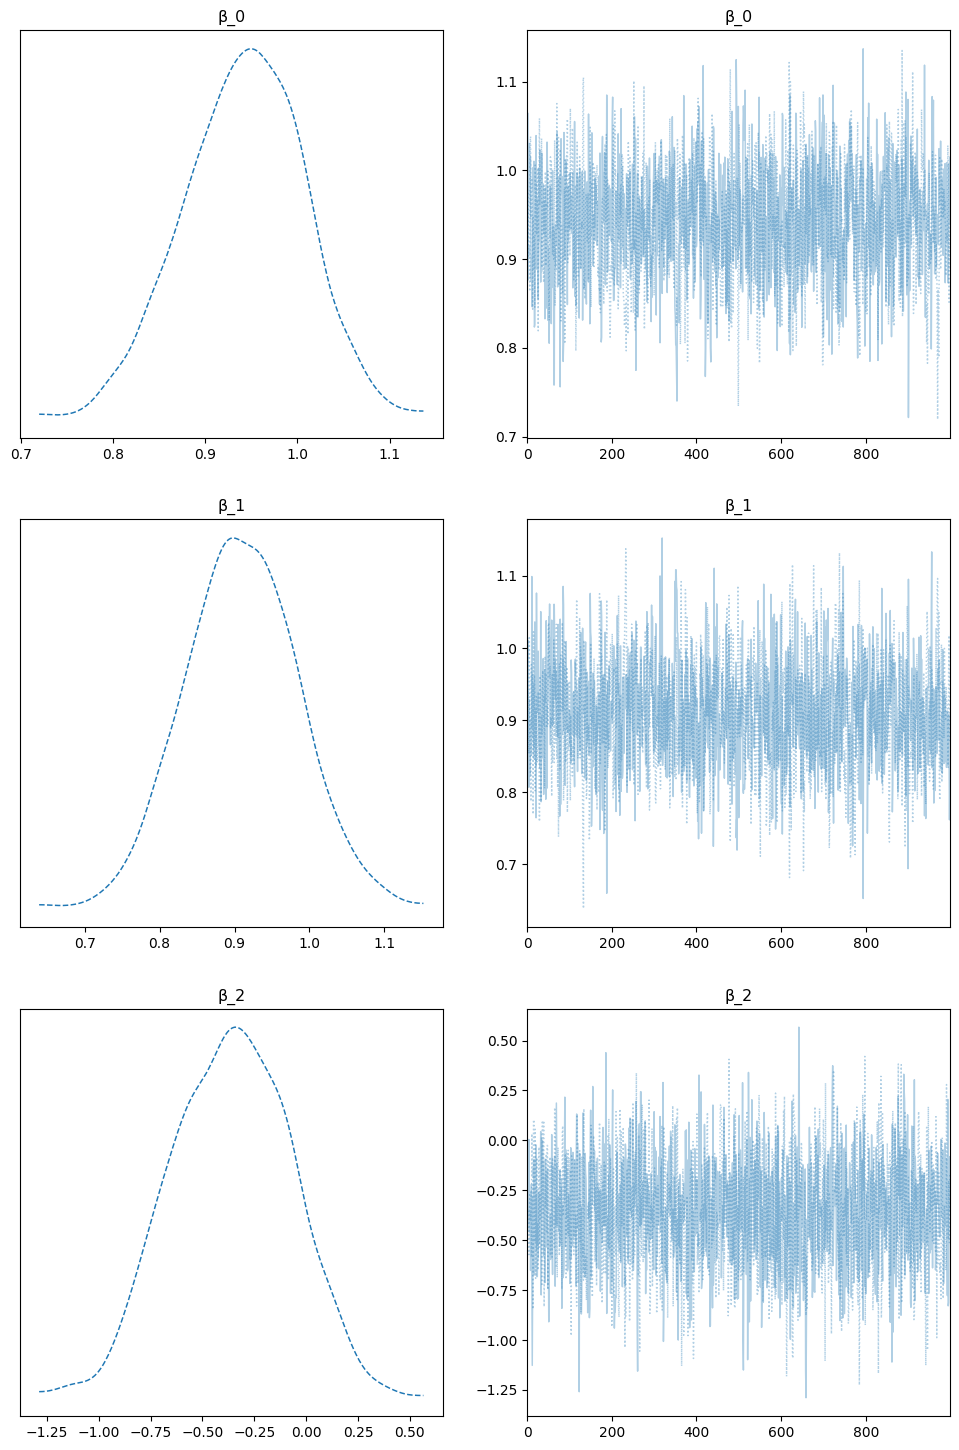

In [68]:
az.plot_trace(idata, combined=True, figsize=(12, 18));

- **Posterior statistics**

In [69]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β_0,0.94,0.06,0.82,1.06,0.00,0.00,1492.56,1406.22,1.0
β_1,0.91,0.08,0.77,1.05,0.00,0.00,1447.11,1270.59,1.0
β_2,-0.36,0.28,-0.87,0.17,0.01,0.01,1879.29,1575.07,1.0


## **Modeling Using Bambi**

- `Bambi` is a high-level library built on top of `PyMC` that simplifies the process of defining, fitting, and analyzing Bayesian models.

- It uses formula-based approach, similar to other popular statistical libraries like R's `brms` and Python's `statsmodels`.

- It is designed to make Bayesian modeling more accessible and intuitive.

In [70]:
%pip install bambi -q
import bambi as bmb

In [71]:
import arviz as az
import numpy as np

### **Binary Logistic Regression**

#### **Import and Prepare Data**

In [72]:
import pandas as pd

data_df = pd.read_csv('https://raw.githubusercontent.com/awolseid/Datasets/refs/heads/main/Diabetes_data.csv')
data_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,150,66,42,342.0,34.7,0.718,42,0
1,0,113,76,23,30.5,33.3,0.278,23,1
2,2,74,72,23,30.5,32.0,0.102,22,0
3,0,121,66,30,165.0,34.3,0.203,33,1
4,10,115,98,23,30.5,24.0,1.022,34,0
...,...,...,...,...,...,...,...,...,...
563,3,170,64,37,225.0,34.5,0.356,30,1
564,5,108,72,43,75.0,36.1,0.263,33,0
565,0,95,85,25,36.0,37.4,0.247,24,1
566,3,158,70,30,328.0,35.5,0.344,35,1


#### **Define Linear Predictor**

- Define the formula with all covariates as: `formula = "y ~ x1 + x2 + ... + xp"`

In [73]:
covariates = data_df.drop(columns='Outcome').columns
outcome = data_df["Outcome"].name

In [74]:
formula = [' %s + ' % covariate for covariate in covariates]
formula.insert(0, f'{outcome}'+' ~ ')
formula = ' '.join(''.join(formula).split(' ')[:-2])
formula

'Outcome ~  Pregnancies +  Glucose +  BloodPressure +  SkinThickness +  Insulin +  BMI +  DiabetesPedigreeFunction +  Age'

#### **Specify Priors**

- Specify priors for all variables

In [75]:
priors = {
    "Pregnancies"              : bmb.Prior("Normal", mu=0, sigma=1),
    "Glucose"                  : bmb.Prior("Normal", mu=0, sigma=1),
    "BloodPressure"            : bmb.Prior("Normal", mu=0, sigma=1),
    "SkinThickness"            : bmb.Prior("Normal", mu=0, sigma=1),
    "Insulin"                  : bmb.Prior("Normal", mu=0, sigma=1),
    "BMI"                      : bmb.Prior("Normal", mu=0, sigma=1),
    "DiabetesPedigreeFunction" : bmb.Prior("Normal", mu=0, sigma=1),
    "Age"                      : bmb.Prior("Normal", mu=0, sigma=1),
    "Intercept"                : bmb.Prior("Normal", mu=0, sigma=1)
}

#### **Instantiate Model**

In [76]:
binary_logistic = bmb.Model(formula, data=data_df, family="bernoulli") #priors=priors
binary_logistic

       Formula: Outcome ~  Pregnancies +  Glucose +  BloodPressure +  SkinThickness +  Insulin +  BMI +  DiabetesPedigreeFunction +  Age
        Family: bernoulli
          Link: p = logit
  Observations: 568
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.5)
            Pregnancies ~ Normal(mu: 0.0, sigma: 0.2983)
            Glucose ~ Normal(mu: 0.0, sigma: 0.033)
            BloodPressure ~ Normal(mu: 0.0, sigma: 0.082)
            SkinThickness ~ Normal(mu: 0.0, sigma: 0.1106)
            Insulin ~ Normal(mu: 0.0, sigma: 0.0096)
            BMI ~ Normal(mu: 0.0, sigma: 0.1424)
            DiabetesPedigreeFunction ~ Normal(mu: 0.0, sigma: 3.0502)
            Age ~ Normal(mu: 0.0, sigma: 0.0841)

#### **Sample from Posterior**

In [77]:
idata = binary_logistic.fit(draws=5000, tune=1000, random_seed=100)

Output()

#### **Model Summaries**

In [78]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Age,0.015,0.011,-0.006,0.035,0.000,0.000,10767.0,8118.0,1.0
BMI,0.117,0.021,0.079,0.158,0.000,0.000,10872.0,8303.0,1.0
BloodPressure,-0.019,0.011,-0.039,0.001,0.000,0.000,11866.0,7954.0,1.0
DiabetesPedigreeFunction,0.764,0.357,0.088,1.421,0.003,0.004,12458.0,6953.0,1.0
Glucose,0.041,0.005,0.033,0.050,0.000,0.000,11912.0,8331.0,1.0
Insulin,-0.002,0.001,-0.004,0.000,0.000,0.000,12144.0,7778.0,1.0
Intercept,-9.357,0.935,-11.145,-7.632,0.008,0.008,13986.0,8277.0,1.0
Pregnancies,0.114,0.039,0.040,0.188,0.000,0.000,11062.0,8122.0,1.0
SkinThickness,-0.005,0.015,-0.032,0.024,0.000,0.000,10158.0,7560.0,1.0


- Getting ORs

In [79]:
OR_df = az.summary(idata)
OR_df['OR'] = np.exp(OR_df['mean'])
OR_df['%_effect'] = (OR_df['OR'] - 1)*100
OR_df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,OR,%_effect
Age,0.015,0.011,-0.006,0.035,0.000,0.000,10767.0,8118.0,1.0,1.015113,1.511306
BMI,0.117,0.021,0.079,0.158,0.000,0.000,10872.0,8303.0,1.0,1.124119,12.411943
BloodPressure,-0.019,0.011,-0.039,0.001,0.000,0.000,11866.0,7954.0,1.0,0.981179,-1.882064
DiabetesPedigreeFunction,0.764,0.357,0.088,1.421,0.003,0.004,12458.0,6953.0,1.0,2.146846,114.684645
Glucose,0.041,0.005,0.033,0.050,0.000,0.000,11912.0,8331.0,1.0,1.041852,4.185211
Insulin,-0.002,0.001,-0.004,0.000,0.000,0.000,12144.0,7778.0,1.0,0.998002,-0.199800
Intercept,-9.357,0.935,-11.145,-7.632,0.008,0.008,13986.0,8277.0,1.0,0.000086,-99.991364
Pregnancies,0.114,0.039,0.040,0.188,0.000,0.000,11062.0,8122.0,1.0,1.120752,12.075212
SkinThickness,-0.005,0.015,-0.032,0.024,0.000,0.000,10158.0,7560.0,1.0,0.995012,-0.498752


#### **Plots and Diagnostics**

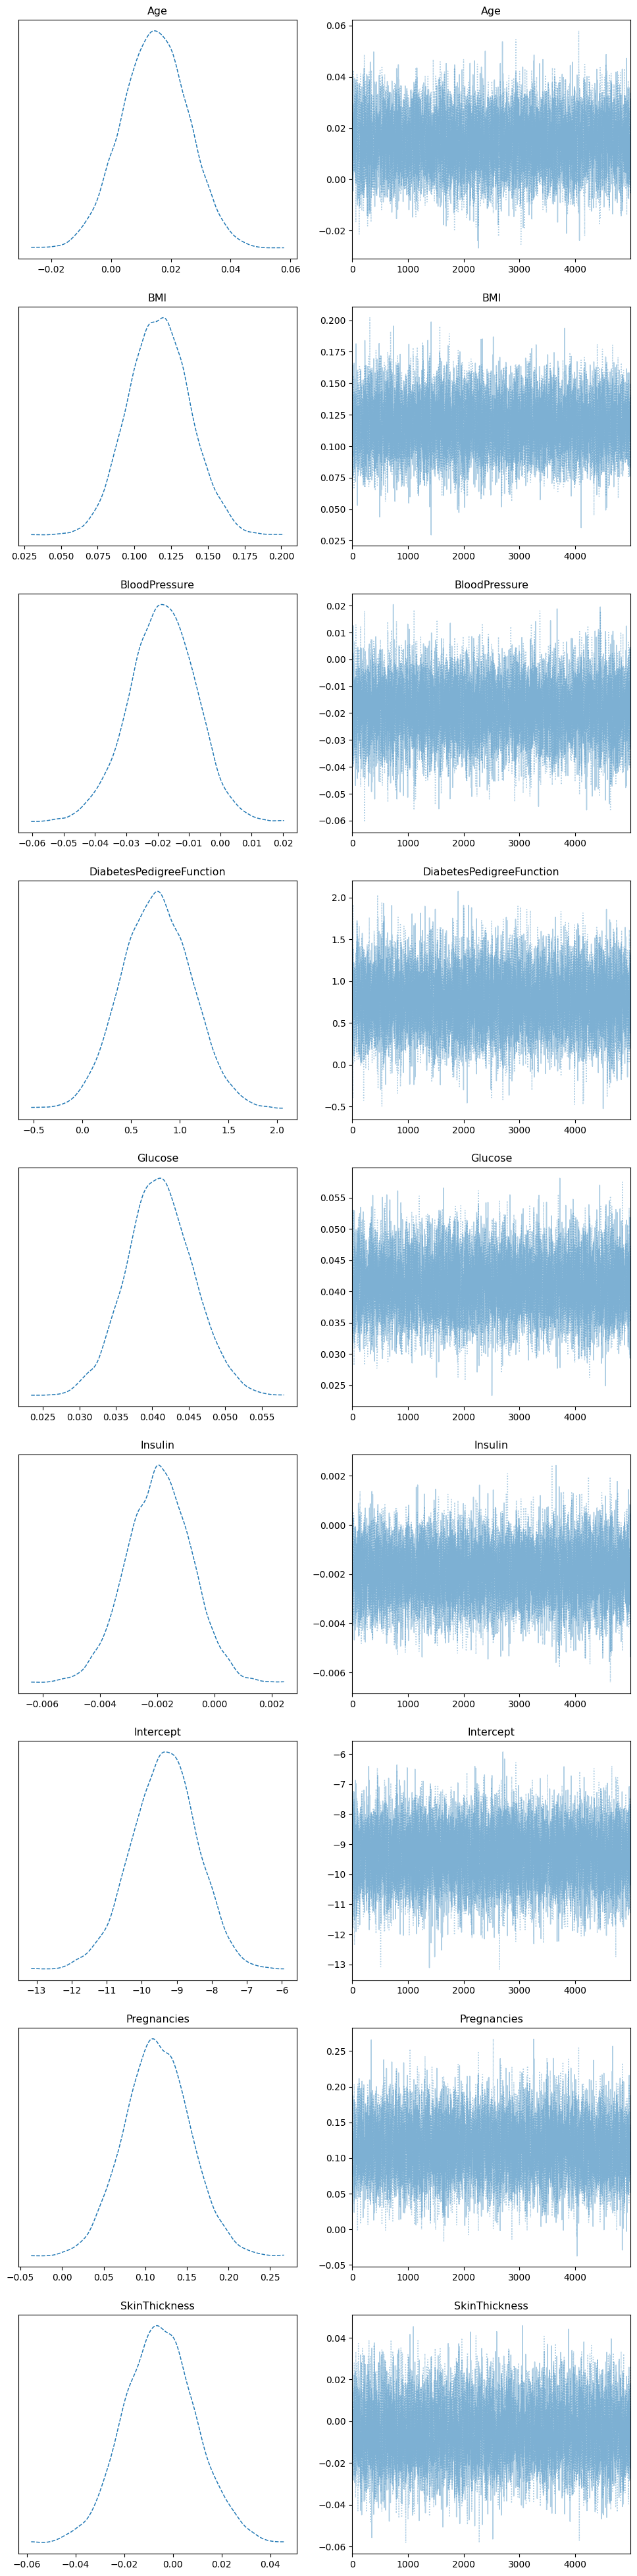

In [80]:
az.plot_trace(idata, combined=True, figsize=(12, 50));

### **Count Response Models**

In [81]:
data = pd.DataFrame({
    "x": [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5],
    "y": [1, 2, 4, 3, 7, 8, 10]
})

#### **Poisson Regression Model**

In [82]:
model_pois = bmb.Model("y ~ x", data=data, family="poisson")
results_pois = model_pois.fit()

Output()

#### **Negative Binomial Regression**

In [83]:
model_nb = bmb.Model("y ~ x", data=data, family="negativebinomial")
results_nb = model_nb.fit()

Output()

# **Further Reading**

- [Bayesian Modeling and Computation in Python](https://bayesiancomputationbook.com/welcome.html#)

- [Introductory Overview of PyMC](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#introductory-overview-of-pymc)
